# Αριθμητική Ανάλυση
## Εργασία 2

In [1]:
# Εισαγωγή μονάδων κώδικα
# - Μην αλλάζετε αυτό το κελί.

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Στοιχεία φοιτητή
# - Εισάγετε το όνομά σας με ελληνικούς χαρακτήρες.

onoma = "ΘΕΟΔΩΡΟΣ-ΚΟΣΜΑΣ"
eponymo = "ΓΟΥΝΕΛΑΣ"
AM = 3121207

### Άσκηση 1
Γράψτε μια συνάρτηση με το όνομα `myfunction1` που δέχεται ως όρισμα ενα διάνυσμα $C=[c_a,c_b,c_c]$ με τις 3 παραμέτρους ενός τριωνύμου $c_a x^2+c_b x+c_c$ και επιστρέφει ένα διάνυσμα με δύο στοιχεία που αντιστοιχούν στις ρίζες. Σε περίπτωση που το τριώνυμο απλοποιείται σε εξίσωση πρώτου βαθμού, το δεύτερο στοιχείο πρέπει να είναι $NaN$. Σε περίπτωση που δεν υπάρχουν πραγματικές ρίζες ή η εξίσωση είναι αδύνατη, η συνάρτηση πρέπει να επιστρέφει $NaN$ και στις δύο τιμές.
 
Ελέγξτε τα αποτελέσματα της συνάρτησης για τα τριώνυμα:
$$
\begin{split}
\begin{aligned}
(a+1)&x^2&+(b+1) x&+(c+10)\\
(a+1)&x^2&+(b+1) x&-(c+1)\\
0&x^2&+(b+1) x&+(c+1)
\end{aligned}
\end{split}
$$
όπου a,b,c τα 3 τελευταία ψηφία του αριθμού μητρώου σας (c=τελευταίο).

In [3]:
# Λύση της άσκησης 1
# - Σε αυτό το κελί γράψτε μόνο τις ζητούμενες συναρτήσεις χωρίς print και input.
a = int(str(AM)[-3])
b = int(str(AM)[-2])
c = int(str(AM)[-1])


def myfunction1(C):
    Ca = C[0]
    Cb = C[1]
    Cc = C[2]
    
    if Ca == 0:
        # Polynomial is of first degree
        root = -Cc / Cb
        return [root, np.nan]
    # Calculate the discriminant
    discriminant = Cb**2 - 4*Ca*Cc
    # Check if the equation has real roots
    if discriminant > 0:
        # Calculate the two roots
        root1 = (-Cb + np.sqrt(discriminant)) / (2*Ca)
        root2 = (-Cb - np.sqrt(discriminant)) / (2*Ca)
        return [root1, root2]
    elif discriminant == 0:
        # Calculate the single root
        root = -Cb / (2*Ca)
        return [root, np.nan]
    else:
        # No real roots
        return [np.nan, np.nan]

In [4]:
# Πρόχειρο άσκησης 1
# - Σε αυτό το κελί μπορείτε να τυπώσετε μεταβλητές για επαλήθευση. Δεν λαμβάνεται υπόψη στην βαθμολόγηση.
print(myfunction1([a+1, b+1, c+10]))
print(myfunction1([a+1, b+1, -c+1]))
print(myfunction1([0, b+1, c+1]))


[nan, nan]
[1.0971675407097272, -2.4305008740430605]
[-2.5, nan]


### Άσκηση 2

Η μετάδοση θερμότητας εντός ενός μονοδιάστατου τοιχώματος σε συνθήκες μόνιμης κατάστασης δίνεται από την διαφορική εξίσωση: 

$$
\frac{d}{dx}(k\frac{dT}{dx})=0
$$

Σε πρακτικές εφαρμογές χρησιμοποιούνται συχνά οι οριακές συνθήκες:
$$
\left. {-k\frac{dT}{dx}}\right|_{x=0}=h_{in}(T_{in}-T_{x=0})\\
\left. -k\frac{dT}{dx}\right|_{x=L}=h_{out}(T_{x=L}-T_{out})
$$

Το παραπάνω πρόβλημα μπορεί να λυθεί αριθμητικά εφαρμόζοντας πεπερασμένες διαφορές και καταλήγοντας σε ένα γραμμικό σύστημα $n$ εξισώσεων και $n$ άγνωστων θερμοκρασιών που αντιστοιχούν στα σημεία $0,Δx,2Δx,\dots,L$:

$$
\begin{bmatrix}
\frac{k}{Δx}+h_{in} & -\frac{k}{Δx} & 0 & {\ldots} & 0 &{\ldots}& 0 \\
-\frac{k}{Δx} & 2\frac{k}{Δx} & -\frac{k}{Δx} & {\ldots} & 0 &{\ldots}& 0 \\
0 & -\frac{k}{Δx} & 2\frac{k}{Δx} & -\frac{k}{Δx} & 0 &{\ldots}& 0 \\
{\ldots} &{\ldots} &{\ldots} & {\ldots}&{\ldots} &{\ldots}&{\ldots}\\
0 & 0 & -\frac{k}{Δx}& 2\frac{k}{Δx}& -\frac{k}{Δx} & 0 &{\ldots} \\
{\ldots} &{\ldots} &{\ldots} & {\ldots}&{\ldots}&{\ldots}&{\ldots} \\
0& 0 & 0 & {\ldots}& 0 & -\frac{k}{Δx} &\frac{k}{Δx}+h_{out} \\
\end{bmatrix}
\begin{bmatrix}
T_1\\
T_2\\
T_3\\
{\ldots}\\
{T_i}\\
{\ldots}\\
T_n\\
\end{bmatrix}
=
\begin{bmatrix}
h_{in}T_{in}\\
0\\
0\\
{\ldots}\\
0\\
{\ldots}\\
h_{out}T_{out}\\
\end{bmatrix}
$$

με
- $k$ τον συντελεστή θερμικής αγωγιμότητας του υλικού του τοιχώματος
- $Δx=\frac{L}{n-1}$ το χωρικό βήμα της διακριτοποίησης του πάχους $L$ του τοιχώματος
- $h_{in}$ τον συντελεστή συναγωγής στο εσωτερικό
- $h_{out}$ τον συντελεστή συναγωγής στο εξωτερικό

Γράψτε μια συνάρτηση `myfunction2` που δέχεται ως ορίσματα τα μεγέθη $k,L,h_{in},T_{in},h_{out},T_{out},n$ και επιστρέφει ένα διάνυσμα με τις θερμοκρασίες $[Τ_1,Τ_2,\dots,T_n]$. Για τον υπολογισμό του διανύσματος μπορεί να επιλεγεί οποιαδήποτε μέθοδος επίλυσης.

Ελέγξτε τα αποτελέσματα της συνάρτησης για
- $k=1\quad\frac{W}{mK}$
- $L=0.3+\frac{a}{45}\quad m$
- $h_{in}=4+\frac{b}{5}\quad \frac{W}{m^2K}$
- $T_{in}=21\quad  °C$
- $h_{out}=8\quad \frac{W}{m^2K}$
- $T_{out}=8-c \quad °C$
- $n=10$

Για δικιά σας κατανόηση μπορείτε να κατασκευάσετε γράφημα θερμοκρασίας[°C]-απόστασης[m] με τα σημεία $(0,Τ_1),(Δx,T_2),(2Δx,T_3),\dots,((n-1)Δx,T_n)$.

```
Ερώτηση για τις εξετάσεις: Λαμβάνοντας υπόψη την μορφή του πίνακα, ποια μέθοδο επίλυσης θα εφαρμόζατε για να περιορίσετε το υπολογιστικό φορτίο;
```

In [5]:
# Λύση της άσκησης 2
# - Σε αυτό το κελί γράψτε μόνο τις ζητούμενες συναρτήσεις χωρίς print και input.
def myfunction2(k, L, h_in, T_in, h_out, T_out, n):
    dx = L / (n - 1)
    A = np.zeros((n, n))
    B = np.zeros(n)

    # Fill the coefficient matrix A and the right-hand side vector b
    A[0, 0] = k / dx + h_in
    A[0, 1] = -k / dx
    B[0] = h_in * T_in
    for i in range(1, n - 1):
        A[i, i - 1] = -k / dx
        A[i, i] = 2 * k / dx
        A[i, i + 1] = -k / dx
    A[-1, -2] = -k / dx
    A[-1, -1] = k / dx + h_out
    B[-1] = h_out * T_out

    # Solve the system
    T = np.linalg.solve(A, B)
    return T


[14.03675048 12.8108747  11.58499893 10.35912315  9.13324737  7.90737159
  6.68149581  5.45562003  4.22974425  3.00386847]


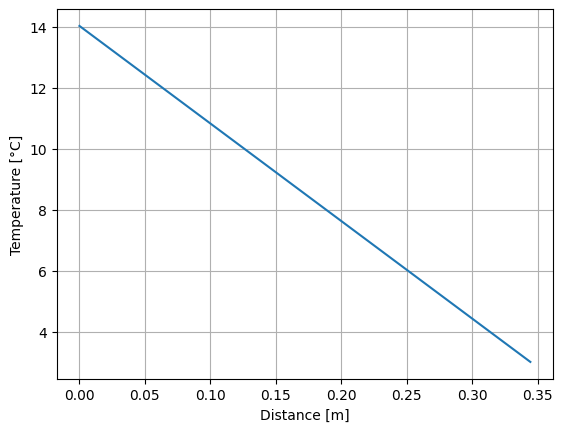

In [6]:
# Πρόχειρο άσκησης 2
# - Σε αυτό το κελί μπορείτε να τυπώσετε μεταβλητές για επαλήθευση. Δεν λαμβάνεται υπόψη στην βαθμολόγηση.
# Test the function
k = 1
L = 0.3 + a/45
h_in = 4 + b/5
T_in = 21
h_out = 8
T_out = 8 - c
n = 10

T = myfunction2(k, L, h_in, T_in, h_out, T_out, n)
print(T)

# Plot the results
x = np.linspace(0, L, n)
plt.plot(x, T)
plt.xlabel('Distance [m]')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()


### Άσκηση 3
Γράψτε μια συνάρτηση `myfunction3` που επιλύει το γραμμικό σύστημα:

$$
\begin{bmatrix}
3 & -1 & -2\\
2 & 5 & -3\\
3 & -2 & 5
\end{bmatrix}
\cdot
\begin{bmatrix} x_1\\ x_2\\ x_3 \end{bmatrix}
=
\begin{bmatrix} a+1\\ b+2\\ c+3 \end{bmatrix}
$$
όπου a,b,c τα 3 τελευταία ψηφία του αριθμού μητρώου σας (c=τελευταίο).

Χρησιμοποιήστε την μέθοδο Gauss-Seidel σταματώντας όταν όλα τα στοιχεία της καινούργιας εκτίμησης αποκλίνουν από την προηγούμενη λιγότερο από $10^{-3}$ κατά απόλυτη τιμή. Η συνάρτηση θα δέχεται ως όρισμα ένα διάνυσμα $x_{init}$ με τις αρχικές τιμές και θα επιστρέφει ένα διάνυσμα 3 στοιχείων $[x_1,x_2,x_3]$ με τα τελικά αποτελέσματα.

Ελέγξτε τα αποτελέσματα της συνάρτησης για $x_{init}=[0.,0.,0.]$ και $x_{init}=[100.,100.,100.]$.

```
Υπόδειξη: Κατά την αντιγραφή πινάκων χρησιμοποιήστε copy(), όταν θέλετε να φυλάξετε τις τιμές και όχι να δημιουργήσετε ένα δείκτη στον ίδιο χώρο μνήμης.
```
```
Ερώτηση για τις εξετάσεις: Ποια διάνυσμα αρχικών τιμών δινει πιο γρήγορη σύγκλιση και γιατί;
```

In [7]:
# Λύση της άσκησης 3
# - Σε αυτό το κελί γράψτε μόνο τις ζητούμενες συναρτήσεις χωρίς print και input.
def myfunction3(x_init):
    A = np.array([[3, -1, -2], [2, 5, -3], [3, -2, 5]])
    B = np.array([a+1, b+2, c+3])
    x = x_init.copy()
    while True:
        x_new = x.copy()
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (B[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x_new, rtol=1e-3):
            break
        x = x_new
    return x

In [8]:
# Πρόχειρο άσκησης 3
# - Σε αυτό το κελί μπορείτε να τυπώσετε μεταβλητές για επαλήθευση. Δεν λαμβάνεται υπόψη στην βαθμολόγηση.
x_init = np.zeros(3)
x = myfunction3(x_init)
print('Solution with initial guess [0, 0, 0]:', x)

x_init = np.full(3, 100.)
x = myfunction3(x_init)
print('Solution with initial guess [100, 100, 100]:', x)


Solution with initial guess [0, 0, 0]: [2.26388992 0.947712   1.42075085]
Solution with initial guess [100, 100, 100]: [2.26377051 0.94787368 1.42088716]
